**X-Ray classification**

**Deep augmentation**

**100 epochs**

**all**

* **densenet**

# Libraries

In [1]:
import tensorflow as tf
import lib.data_loader as data_loader
import lib.plot_learning_curves as plot_learning_curves
import models.base_model as base_model
import models.densenet as densenet
import models.resnet as resnet
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.image as mpimg
# from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import random, os
import numpy as np
import pandas as pd
import json

# import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import gc
# from skimage.transform import resize
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.metrics import f1_score, recall_score, precision_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
! pip install -q -U keras-tuner
import keras_tuner as kt

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0
Train model
Tensorflow version 2.4.0
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version 2.4.0


# Data  munging

In [2]:
# mount data
data_path = 'data/MURA-v1.1/'
directory = 'data/'
! pwd
train, test, bodyparts, bodyparts_train_validation_dict, train_generators, valid_generators, test_generators = data_loader.data_loader(data_augmentation='deep_augment')

/tf

Import train and test data


Create dictionary for training and validation set per body part

Doing a light data augmentation

Create dictionary for training, validation and test set per body part

Found 1649 validated image filenames.
Found 176 validated image filenames.
Found 301 validated image filenames.
Found 7537 validated image filenames.
Found 842 validated image filenames.
Found 563 validated image filenames.
Found 1152 validated image filenames.
Found 120 validated image filenames.
Found 288 validated image filenames.
Found 8771 validated image filenames.
Found 981 validated image filenames.
Found 659 validated image filenames.
Found 4594 validated image filenames.
Found 512 validated image filenames.
Found 461 validated image filenames.
Found 4440 validated image filenames.
Found 491 validated image filenames.
Found 465 validated image filenames.
Found 4983 validated image filenames.
Found 560 validated image filenames.
Found 460 validated image filenames.
Data munging 

# DenseNet

In [3]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [ ]:
densenet_model_top_histories = {}

for bodypart in bodyparts:
    print(bodypart)
    print("\nBuild model\n")
    model =  densenet.build_model_on_densenet()
    print('\nTrain model\n')
    print(bodypart)
    densenet_model_top_histories[bodypart] = densenet.train_model(model, 
                                                                 bodypart,
                                                                 valid_generators,
                                                                 train_generators,
                                                                 70)
    print('\nSave training history\n')
    with open("data/history/history_densenet_model_top_model_70epochs_deep_augment_"+bodypart+".json", "w") as file:
        json.dump(densenet_model_top_histories[bodypart].history, file)
        print('\nSave model\n')
    model.save("data/models/densenet_model_top_70epochs_deep_augment_"+bodypart)
    model.save("data/models/densenet_model_top_70epochs_deep_augment_"+bodypart+".h5")
    print('\nEvaluate model\n')
#     densenet.eval_func(test[test['bodypart'] == bodypart]['class'], 
#                     model.predict(test_generators[bodypart]))
    model.evaluate(test_generators[bodypart], verbose=1)
    model.evaluate(train_generators[bodypart], verbose=1)
    model.evaluate(valid_generators[bodypart], verbose=1)
    print("Delete model")
    clean_up(model)

XR_FOREARM

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
_________________________________________________________________

Train model

XR_FOREARM
Using validation_steps = 6
Using steps_per_epoch = 52


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/70
52/52 [==============================] - 285s 5s/step - loss: 0.7086 - binary_accuracy: 0.5692 - val_loss: 0.6445 - val_binary_accuracy: 0.6278
Epoch 2/70
52/52 [==============================] - 270s 5s/step - loss: 0.6425 - binary_accuracy: 0.6389 - val_loss: 0.5736 - val_binary_accuracy: 0.7111
Epoch 3/70
52/52 [==============================] - 290s 6s/step - loss: 0.5734 - binary_accuracy: 0.7097 - val_loss: 0.5258 - val_binary_accuracy: 0.7611
Epoch 4/70
52/52 [==============================] - 304s 6s/step - loss: 0.5365 - binary_accuracy: 0.7433 - val_loss: 0.5037 - val_binary_accuracy: 0.7667
Epoch 5/70
52/52 [==============================] - 303s 6s/step - loss: 0.5273 - binary_accuracy: 0.7558 - val_loss: 0.4869 - val_binary_accuracy: 0.7778
Epoch 6/70
52/52 [==============================] - 301s 6s/step - loss: 0.5060 - binary_accuracy: 0.7535 - val_loss: 0.4804 - val_binary_accuracy: 0.7778
Epoch 7/70
52/52 [==============================] - 323s 6s/step - los

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6/6 [==============================] - 27s 4s/step - loss: 0.4232 - binary_accuracy: 0.8444
Delete model
XR_HUMERUS

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
_________________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 18s 5s/step - loss: 0.6147 - binary_accuracy: 0.6720
Delete model
XR_WRIST

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
___________________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


31/31 [==============================] - 85s 3s/step - loss: 0.5055 - binary_accuracy: 0.7648
Delete model
XR_ELBOW

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
_________________________________________________

In [ ]:
# for bodypart in bodyparts:
#     print(bodypart)
#     model = tf.keras.models.load_model("data/models/densenet_model_top_70epochs_deep_augment_"+bodypart+".h5")
#     model.evaluate(train_generators[bodypart], verbose=1)
#     model.evaluate(valid_generators[bodypart], verbose=1)
#     print("Delete model")
#     clean_up(model)

## Remaining

In [8]:
bodyparts

{'XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST'}

In [9]:
bodyparts_left = ['XR_ELBOW',
                  'XR_FINGER', 
                  'XR_HAND', 
                  'XR_SHOULDER']

In [10]:
densenet_model_top_histories = {}

for bodypart in bodyparts_left:
    print(bodypart)
    print("\nBuild model\n")
    model =  densenet.build_model_on_densenet()
    print('\nTrain model\n')
    print(bodypart)
    densenet_model_top_histories[bodypart] = densenet.train_model(model, 
                                                                 bodypart,
                                                                 valid_generators,
                                                                 train_generators,
                                                                 70)
    print('\nSave training history\n')
    with open("data/history/history_densenet_model_top_model_70epochs_deep_augment_"+bodypart+".json", "w") as file:
        json.dump(densenet_model_top_histories[bodypart].history, file)
        print('\nSave model\n')
    model.save("data/models/densenet_model_top_70epochs_deep_augment_"+bodypart)
    model.save("data/models/densenet_model_top_70epochs_deep_augment_"+bodypart+".h5")
    print('\nEvaluate model\n')
#     densenet.eval_func(test[test['bodypart'] == bodypart]['class'], 
#                     model.predict(test_generators[bodypart]))
    model.evaluate(test_generators[bodypart], verbose=1)
    model.evaluate(train_generators[bodypart], verbose=1)
    model.evaluate(valid_generators[bodypart], verbose=1)
    print("Delete model")
    clean_up(model)

XR_ELBOW

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
_________________________________________________________________

Train model

XR_ELBOW
Using validation_steps = 16
Using steps_per_epoch = 139


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/70
139/139 [==============================] - 368s 3s/step - loss: 0.7237 - binary_accuracy: 0.5599 - val_loss: 0.6142 - val_binary_accuracy: 0.6599
Epoch 2/70
139/139 [==============================] - 390s 3s/step - loss: 0.6299 - binary_accuracy: 0.6553 - val_loss: 0.6030 - val_binary_accuracy: 0.6782
Epoch 3/70
139/139 [==============================] - 419s 3s/step - loss: 0.5857 - binary_accuracy: 0.7040 - val_loss: 0.5546 - val_binary_accuracy: 0.7271
Epoch 4/70
139/139 [==============================] - 435s 3s/step - loss: 0.5700 - binary_accuracy: 0.7242 - val_loss: 0.5621 - val_binary_accuracy: 0.7210
Epoch 5/70
139/139 [==============================] - 413s 3s/step - loss: 0.5705 - binary_accuracy: 0.7183 - val_loss: 0.5458 - val_binary_accuracy: 0.7291
Epoch 6/70
139/139 [==============================] - 404s 3s/step - loss: 0.5578 - binary_accuracy: 0.7321 - val_loss: 0.5374 - val_binary_accuracy: 0.7393
Epoch 7/70
139/139 [==============================] - 399s

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 57s 3s/step - loss: 0.5071 - binary_accuracy: 0.7780
Delete model
XR_FINGER

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
________________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 73s 5s/step - loss: 0.5815 - binary_accuracy: 0.7051
Delete model
XR_HAND

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
__________________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


18/18 [==============================] - 42s 2s/step - loss: 0.5177 - binary_accuracy: 0.7857
Delete model
XR_SHOULDER

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 1,025
Non-trainable params: 7,037,504
______________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


27/27 [==============================] - 70s 3s/step - loss: 0.5734 - binary_accuracy: 0.7102
Delete model


XR_ELBOW


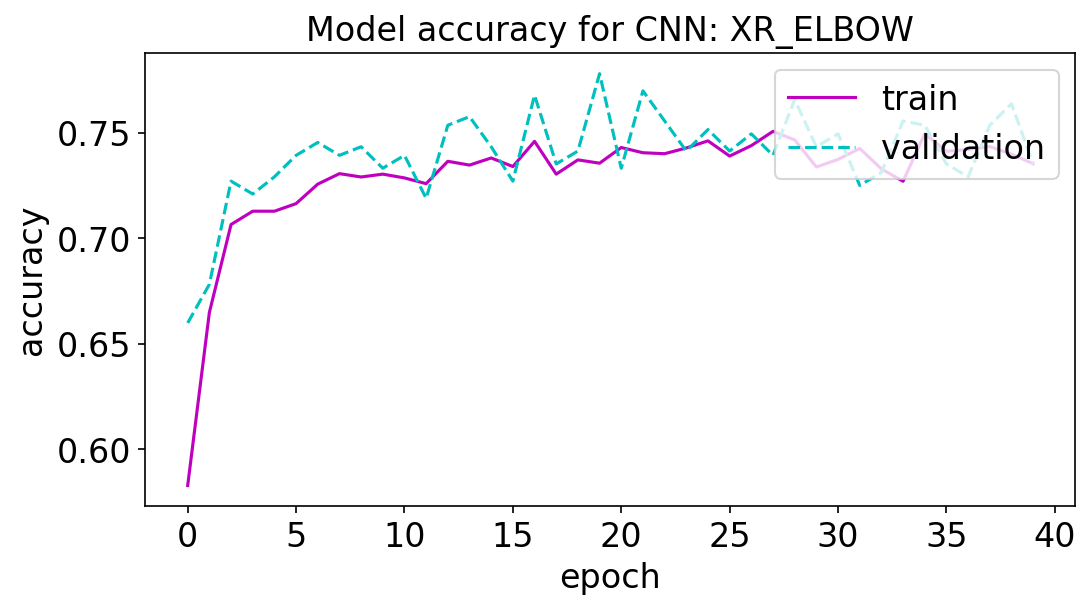

<Figure size 432x288 with 0 Axes>

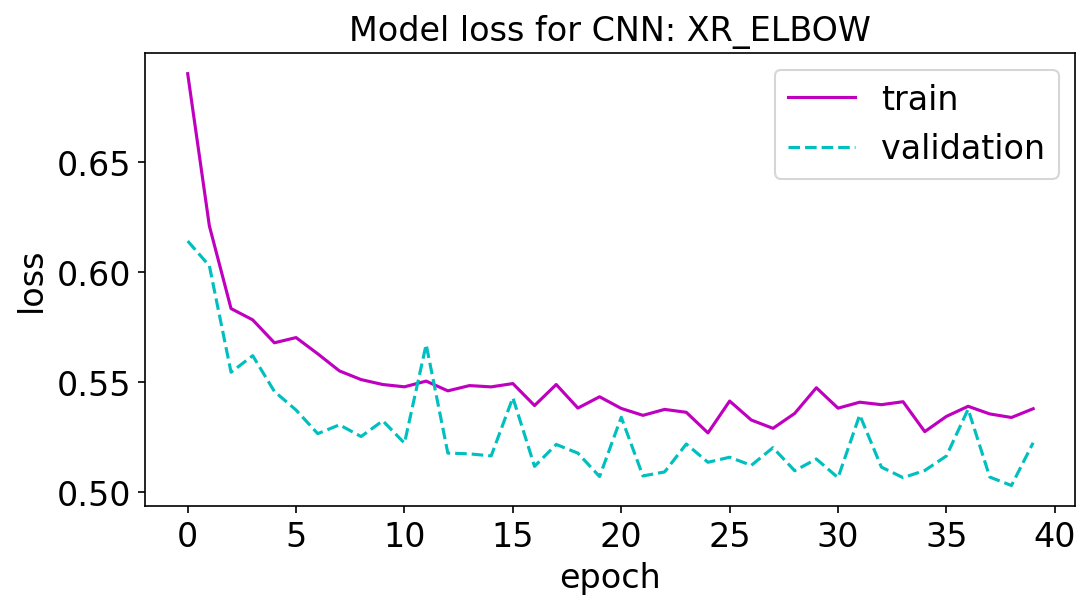

XR_FINGER


<Figure size 432x288 with 0 Axes>

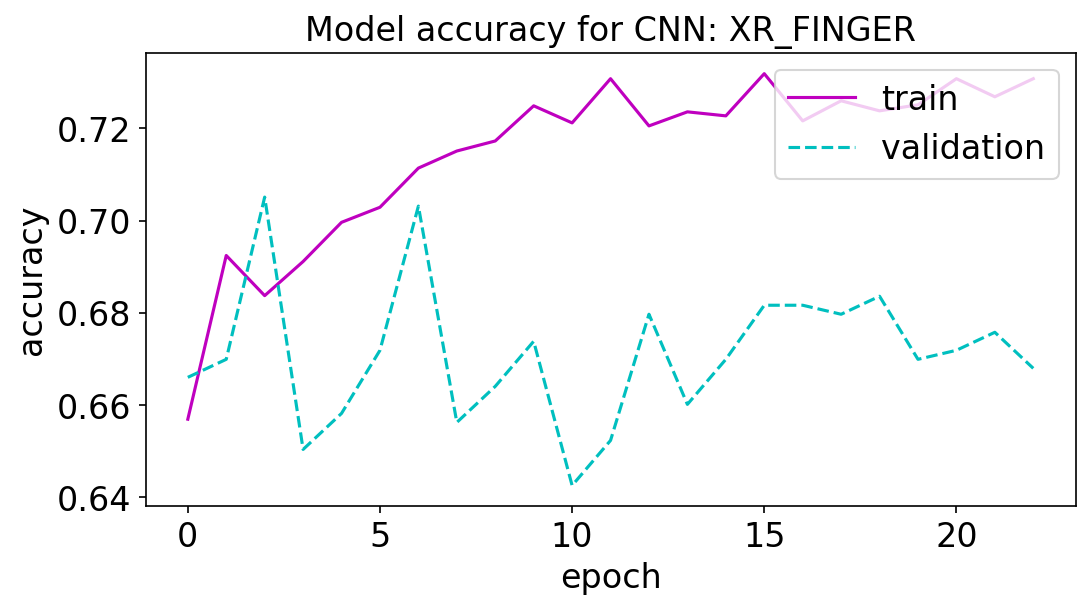

<Figure size 432x288 with 0 Axes>

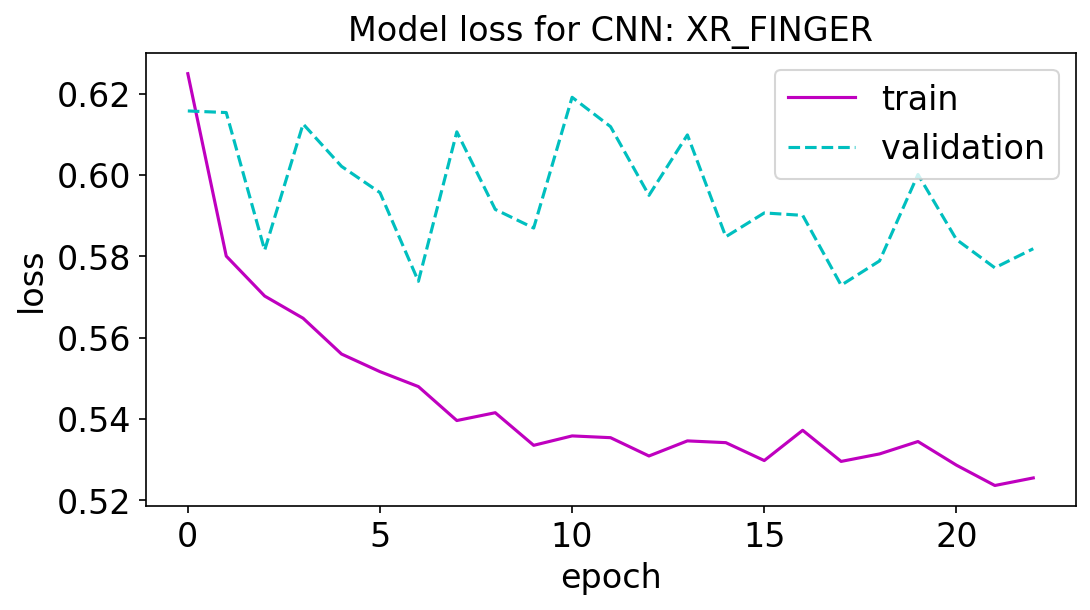

XR_HAND


<Figure size 432x288 with 0 Axes>

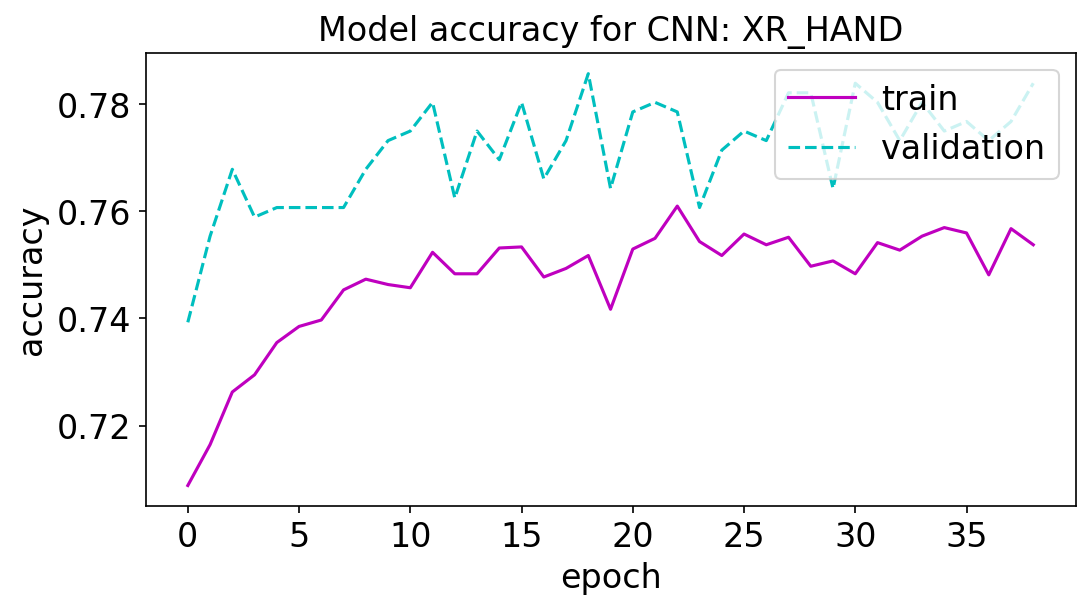

<Figure size 432x288 with 0 Axes>

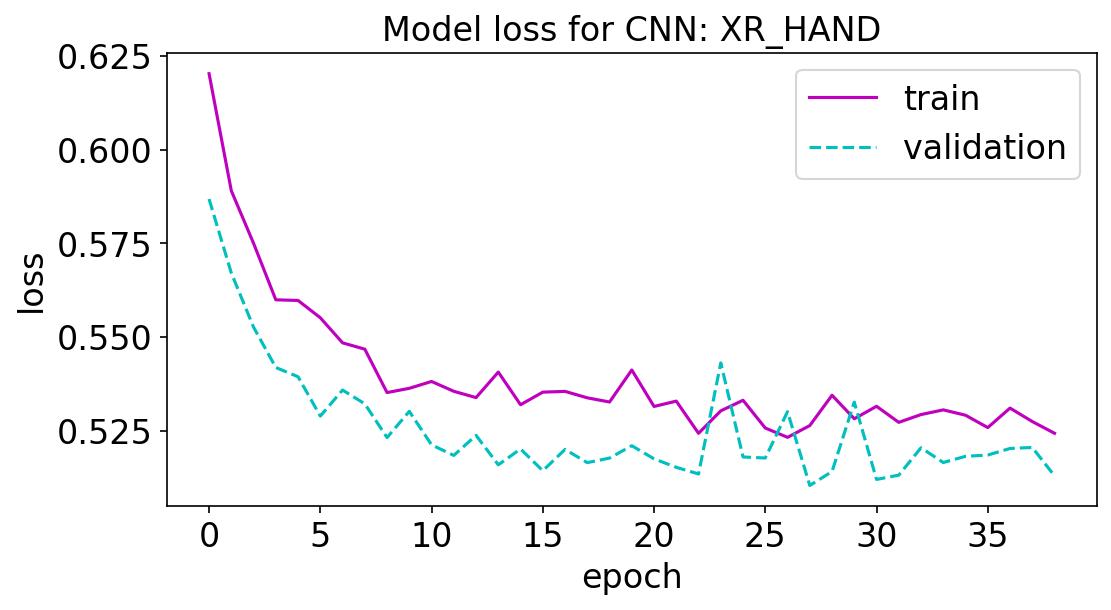

XR_SHOULDER


<Figure size 432x288 with 0 Axes>

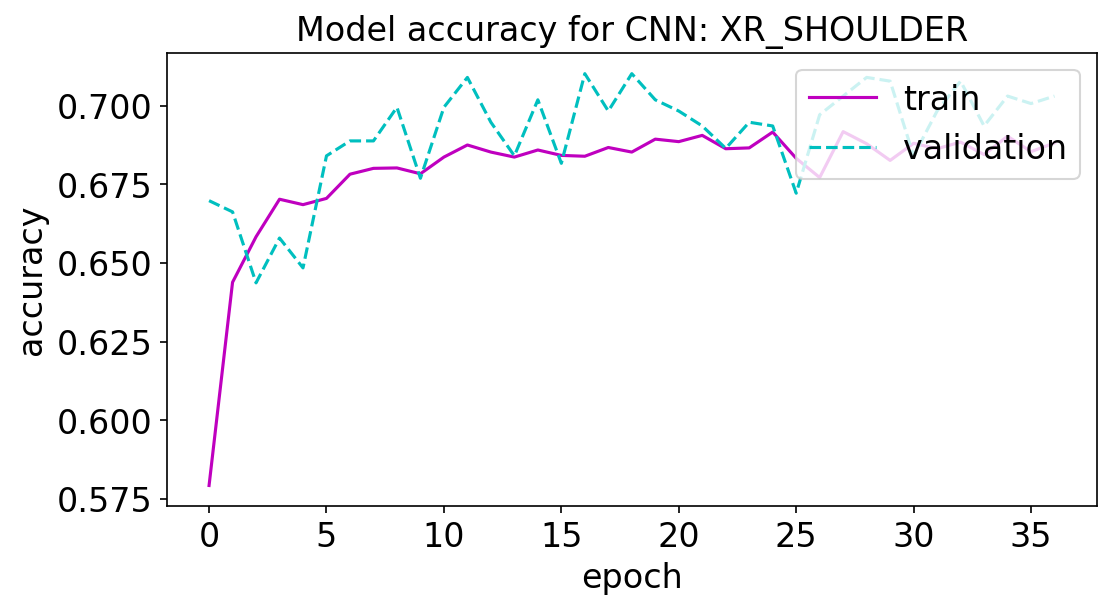

<Figure size 432x288 with 0 Axes>

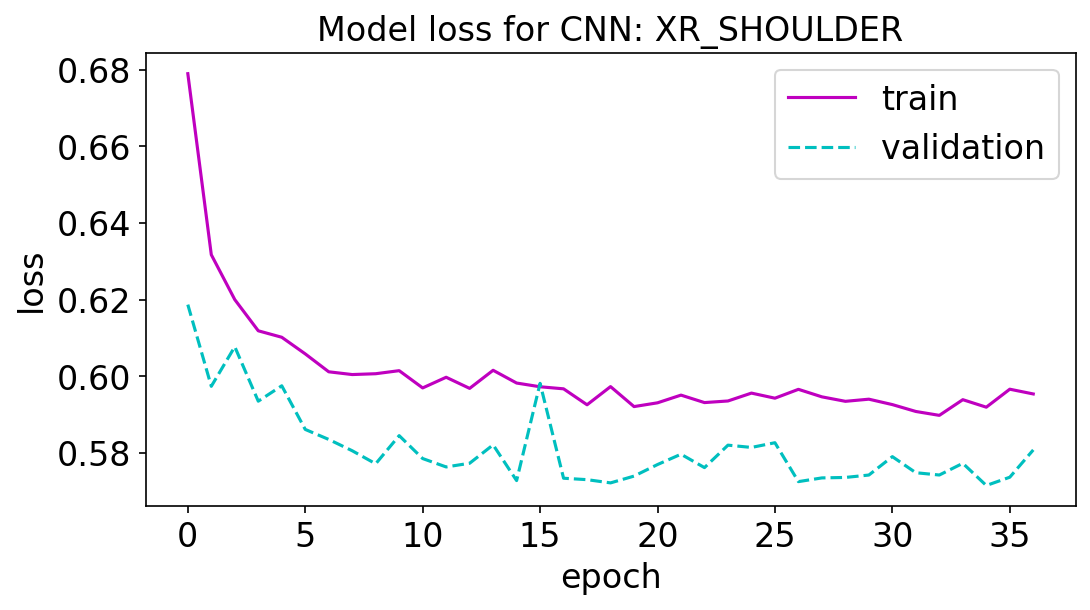

<Figure size 432x288 with 0 Axes>

In [12]:
for bodypart in bodyparts_left:
    print(bodypart)
    plot_learning_curves.plot_history(densenet_model_top_histories[bodypart], 
                                      bodypart,
                                    'densenet_model_top',
                                    70,
                                    data_augmentation='deep_augment')

## Done

In [5]:
des_done = ["XR_FOREARM", "XR_HUMERUS", "XR_WRIST"]

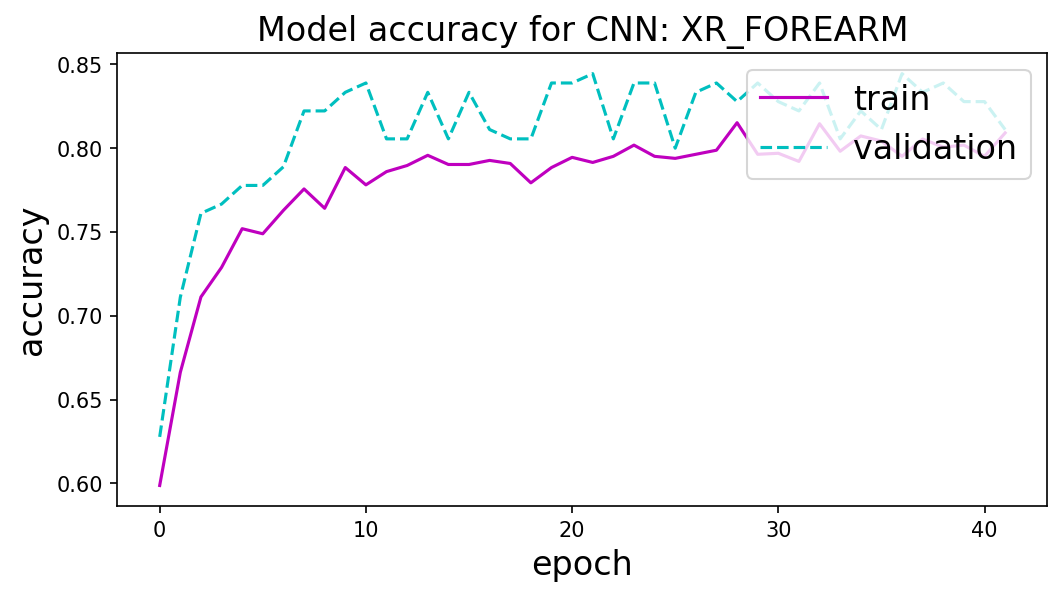

<Figure size 432x288 with 0 Axes>

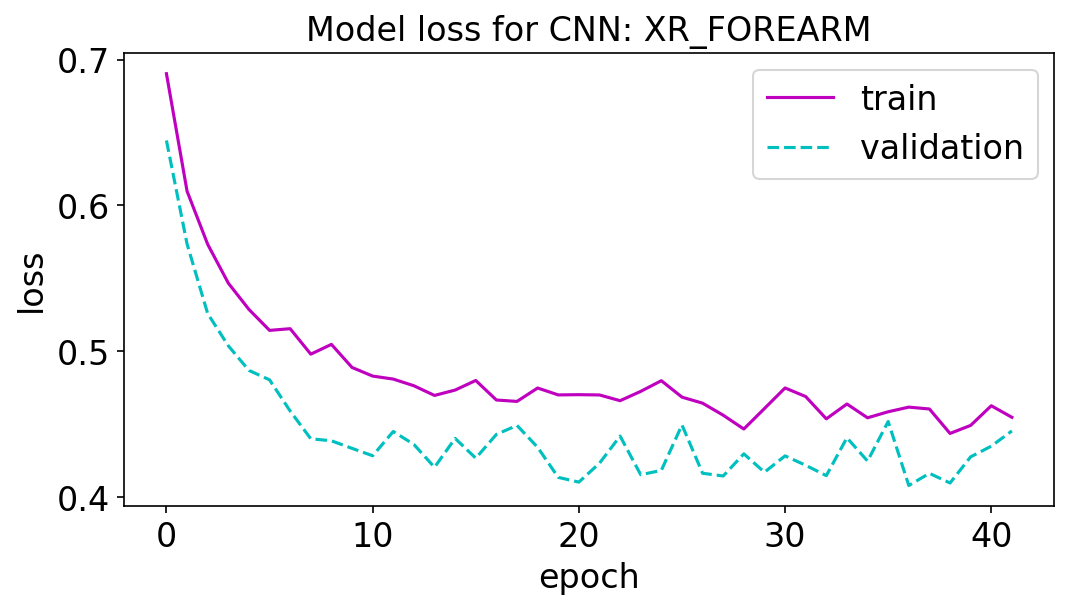

<Figure size 432x288 with 0 Axes>

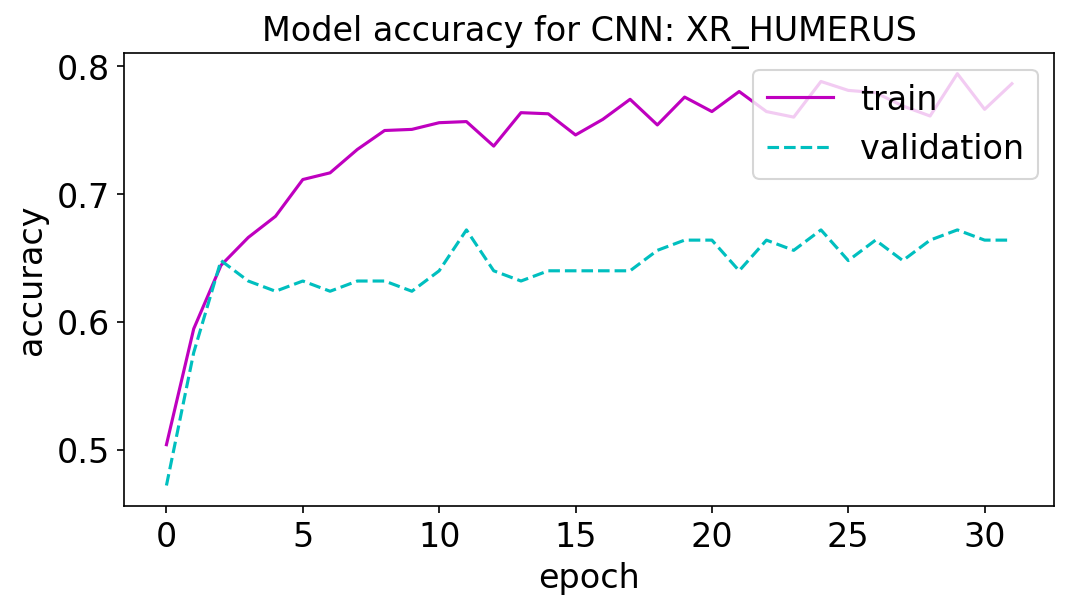

<Figure size 432x288 with 0 Axes>

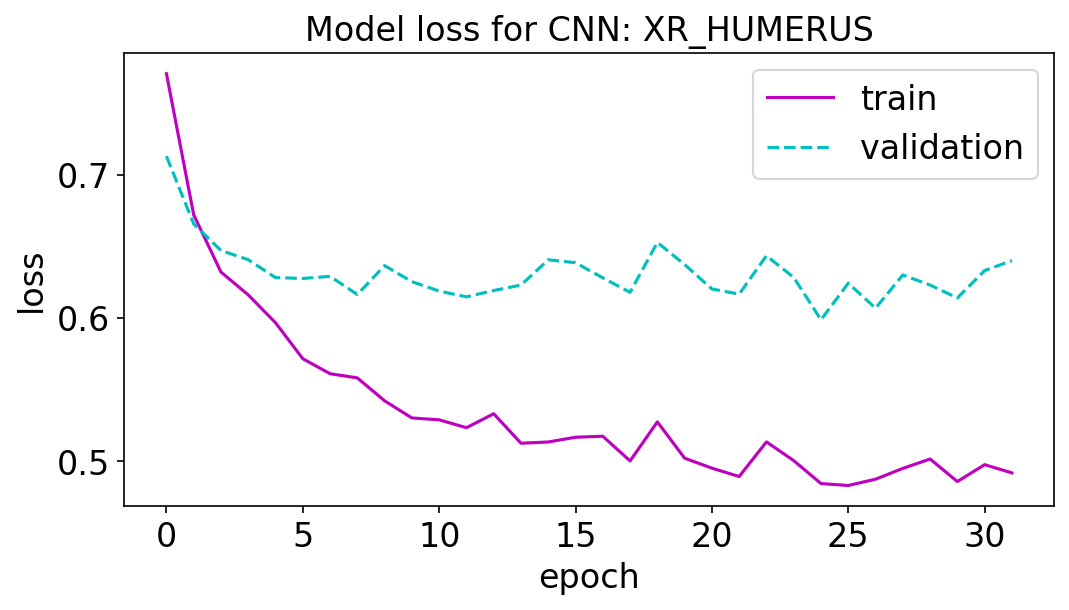

<Figure size 432x288 with 0 Axes>

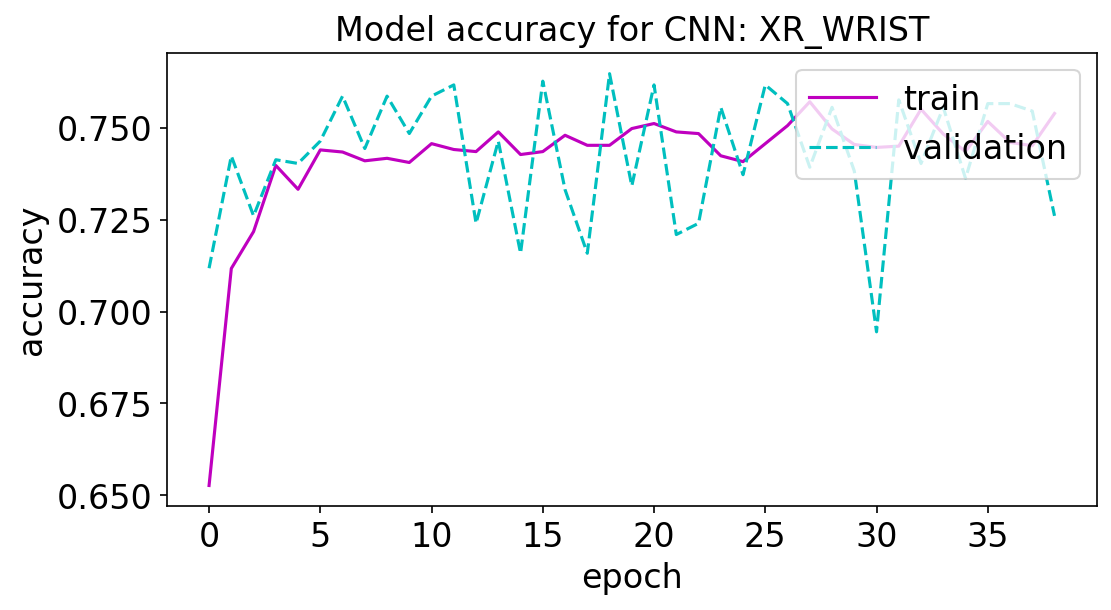

<Figure size 432x288 with 0 Axes>

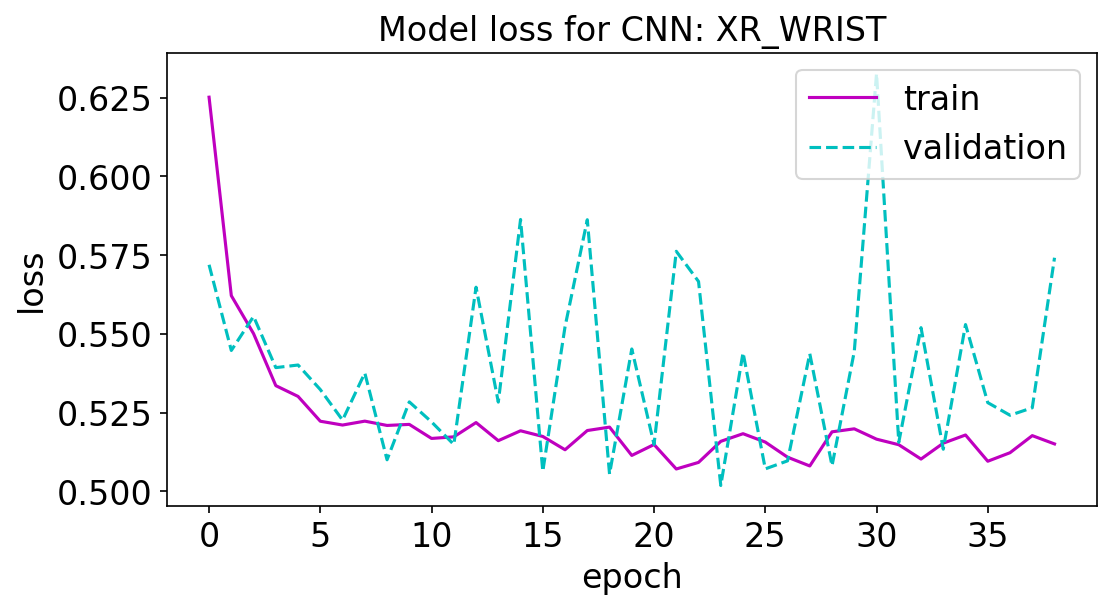

<Figure size 432x288 with 0 Axes>

In [7]:
import json
densenet_model_top_histories_reloaded = {}
for bodypart in des_done:
    url = "data/history/history_densenet_model_top_model_70epochs_deep_augment_"+bodypart+".json"
    f = open(url)
    densenet_model_top_histories_reloaded[bodypart] = json.load(f)

for bodypart in des_done:
    plot_learning_curves.plot_history_from_dict(densenet_model_top_histories_reloaded[bodypart], 
                                     bodypart,
                                     'densenet_model_top',
                                     70,
                                     data_augmentation='deep_augment')